# Kickstarter campaign analysis

We start by importing all necessary packages.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib

The max_column settings have been increased to allow for viewing all the columns in the initial sample overview further below.

Next we import the data and take a quick look at the contents.

In [ ]:
kickstarter_df = pd.read_csv('18k_Projects.csv', decimal=',', dtype={22:str, 23: str, 27:str})
kickstarter_df.head(5)

,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,Comments,Rewards,Goal,Pledged,Backers,Start,End,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Latitude,Longitude,Start Timestamp (UTC),End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,USD,Art,Art,Dodie Egolf,Puyallup,0,0,9,20000,6,2,2013/12/15,2014/01/14,30,Yes,272.0,70,Yes,47.1803951263,-122.2529029846,2013/12/15 01:53:49.000,2014/01/14 01:53:49.000,https://www.kickstarter.com/profile/1370199487,NaN,1,0.0,0.0,2,297,153.0,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,USD,Film & Video,Short Film,James Jacobs,Boston,0,0,8,3000,180,5,2013/12/15,2014/01/17,33,Yes,573.0,57,Yes,42.3323383331,-71.0456199646,2013/12/15 02:30:01.000,2014/01/17 02:30:01.000,https://www.kickstarter.com/profile/737783165,NaN,1,4.0,0.0,0,276,98.0,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,USD,Fashion,Fashion,Uchu Bijin,New York,1,2,17,5000,1941,62,2013/12/15,2014/01/14,30,No,NaN,158,No,40.706577301,-73.8823738098,2013/12/15 01:29:42.000,2014/01/14 01:29:42.000,https://www.kickstarter.com/profile/858150887,http://uchubijin.com,2,2.0,0.0,12,1049,66.0,2
3,514687871,"Poetically Speaking: Stories of Love, Triumph ...",https://www.kickstarter.com/projects/tylicee/p...,failed,USD,Publishing,Poetry,Tylicee Mysreign,Detroit,0,0,4,5000,130,5,2013/12/15,2014/02/13,60,Yes,1285.0,2,Yes,42.3546390533,-83.1028404236,2013/12/15 01:12:28.000,2014/02/13 01:12:28.000,https://www.kickstarter.com/profile/1079088465,http://www.linkedin.com/pub/mys-reign/1a/469/4a8,1,2.0,0.0,0,309,169.0,0
4,683545993,Stranger Travels: Teachings from the Heart of ...,https://www.kickstarter.com/projects/197270300...,failed,USD,Publishing,Nonfiction,Ian Driscoll,Pucallpa,0,0,12,12000,1015,16,2013/12/15,2014/01/14,30,Yes,969.0,411,Yes,-8.43381,-74.55957,2013/12/15 01:17:46.000,2014/01/14 01:17:46.000,https://www.kickstarter.com/profile/1972703001,http://strangertravels.wordpress.com,1,0.0,0.0,6,1636,216.0,0


There is alot of interesting data here. State is probably something we want to look at. Possibly also duration in days, goal vs pledge, number of backers and categories.

What are the dimensions of the data set in rows and columns?

In [ ]:
kickstarter_df.shape

(18142, 35)

What are the columns and their data types?

In [ ]:
kickstarter_df.dtypes

Id                                  int64
Name                               object
Url                                object
State                              object
Currency                           object
Top Category                       object
Category                           object
Creator                            object
Location                           object
Updates                             int64
Comments                            int64
Rewards                             int64
Goal                                int64
Pledged                             int64
Backers                             int64
Start                              object
End                                object
Duration in Days                    int64
Facebook Connected                 object
Facebook Friends                  float64
Facebook Shares                     int64
Has Video                          object
Latitude                           object
Longitude                         

Basic statistics about numerical columns look as follows.

In [ ]:
kickstarter_df.describe()

,Id,Updates,Comments,Rewards,Goal,Pledged,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
count,1.814200e+04,18142.000000,18142.000000,18142.000000,1.814200e+04,1.814200e+04,18142.000000,18142.000000,12290.000000,18142.000000,18142.000000,13898.000000,18041.000000,18142.000000,18142.000000,18041.000000,18142.000000
mean,1.073471e+09,3.368647,34.243027,10.042002,2.653121e+04,1.102364e+04,138.070279,31.398468,694.233686,396.729137,1.520119,5.149950,0.226207,6.898302,668.056278,130.330359,0.679032
std,6.181166e+08,5.547975,539.161283,5.889806,7.583874e+05,7.855300e+04,633.787780,10.058827,783.802343,2544.711314,2.540474,20.351979,0.877530,10.272907,582.136947,96.989659,2.045969
min,1.061440e+05,0.000000,0.000000,2.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,8.000000,0.000000
25%,5.385158e+08,0.000000,0.000000,6.000000,2.000000e+03,2.600000e+02,7.000000,29.000000,216.250000,21.000000,1.000000,0.000000,0.000000,0.000000,276.000000,69.000000,0.000000
50%,1.078580e+09,1.000000,0.000000,9.000000,5.000000e+03,1.722000e+03,29.000000,30.000000,453.000000,104.000000,1.000000,1.000000,0.000000,3.000000,490.000000,105.000000,0.000000
75%,1.606254e+09,5.000000,3.000000,12.000000,1.500000e+04,6.335000e+03,89.000000,32.000000,860.000000,322.000000,1.000000,4.000000,0.000000,10.000000,871.750000,163.000000,0.000000
max,2.147445e+09,128.000000,30341.000000,131.000000,1.000000e+08,6.224955e+06,35383.000000,60.000000,4885.000000,260505.000000,111.000000,1205.000000,24.000000,166.000000,5152.000000,1888.000000,47.000000


We may be interested to know the completeness of the data, as shown below.

In [ ]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 35 columns):
Id                                18142 non-null int64
Name                              18142 non-null object
Url                               18142 non-null object
State                             18142 non-null object
Currency                          18142 non-null object
Top Category                      18142 non-null object
Category                          18142 non-null object
Creator                           18142 non-null object
Location                          18142 non-null object
Updates                           18142 non-null int64
Comments                          18142 non-null int64
Rewards                           18142 non-null int64
Goal                              18142 non-null int64
Pledged                           18142 non-null int64
Backers                           18142 non-null int64
Start                             18142 non-null object
En

It may be easier to get an appreciation of what data is missing

In [ ]:
null_df = kickstarter_df.isnull().sum()
#null_df.columns = ['column', 'missing']
#null_df = null_df[null_df['missing'] > 0]
null_df

Id                                   0
Name                                 0
Url                                  0
State                                0
Currency                             0
Top Category                         0
Category                             0
Creator                              0
Location                             0
Updates                              0
Comments                             0
Rewards                              0
Goal                                 0
Pledged                              0
Backers                              0
Start                                0
End                                  0
Duration in Days                     0
Facebook Connected                   0
Facebook Friends                  5852
Facebook Shares                      0
Has Video                            0
Latitude                          8339
Longitude                         8339
Start Timestamp (UTC)                0
End Timestamp (UTC)      

It would be convenient to have a column for funding in %.

In [ ]:
kickstarter_df['Funding%'] = kickstarter_df['Pledged'] / kickstarter_df['Goal']
kickstarter_df['Success'] = (kickstarter_df['State'] != 'failed').astype(int)
kickstarter_df.head()

,Id,Name,Url,State,Currency,Top Category,Category,Creator,Location,Updates,Comments,Rewards,Goal,Pledged,Backers,Start,End,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Latitude,Longitude,Start Timestamp (UTC),End Timestamp (UTC),Creator Bio,Creator Website,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs,Funding%,Success
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,USD,Art,Art,Dodie Egolf,Puyallup,0,0,9,20000,6,2,2013/12/15,2014/01/14,30,Yes,272.0,70,Yes,47.1803951263,-122.2529029846,2013/12/15 01:53:49.000,2014/01/14 01:53:49.000,https://www.kickstarter.com/profile/1370199487,NaN,1,0.0,0.0,2,297,153.0,0,0.000300,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,USD,Film & Video,Short Film,James Jacobs,Boston,0,0,8,3000,180,5,2013/12/15,2014/01/17,33,Yes,573.0,57,Yes,42.3323383331,-71.0456199646,2013/12/15 02:30:01.000,2014/01/17 02:30:01.000,https://www.kickstarter.com/profile/737783165,NaN,1,4.0,0.0,0,276,98.0,0,0.060000,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,USD,Fashion,Fashion,Uchu Bijin,New York,1,2,17,5000,1941,62,2013/12/15,2014/01/14,30,No,NaN,158,No,40.706577301,-73.8823738098,2013/12/15 01:29:42.000,2014/01/14 01:29:42.000,https://www.kickstarter.com/profile/858150887,http://uchubijin.com,2,2.0,0.0,12,1049,66.0,2,0.388200,0
3,514687871,"Poetically Speaking: Stories of Love, Triumph ...",https://www.kickstarter.com/projects/tylicee/p...,failed,USD,Publishing,Poetry,Tylicee Mysreign,Detroit,0,0,4,5000,130,5,2013/12/15,2014/02/13,60,Yes,1285.0,2,Yes,42.3546390533,-83.1028404236,2013/12/15 01:12:28.000,2014/02/13 01:12:28.000,https://www.kickstarter.com/profile/1079088465,http://www.linkedin.com/pub/mys-reign/1a/469/4a8,1,2.0,0.0,0,309,169.0,0,0.026000,0
4,683545993,Stranger Travels: Teachings from the Heart of ...,https://www.kickstarter.com/projects/197270300...,failed,USD,Publishing,Nonfiction,Ian Driscoll,Pucallpa,0,0,12,12000,1015,16,2013/12/15,2014/01/14,30,Yes,969.0,411,Yes,-8.43381,-74.55957,2013/12/15 01:17:46.000,2014/01/14 01:17:46.000,https://www.kickstarter.com/profile/1972703001,http://strangertravels.wordpress.com,1,0.0,0.0,6,1636,216.0,0,0.084583,0


Based on all of the above information we may now select a limited number of columns for use in our analysis.

In [ ]:
kickstarter_df = kickstarter_df[['Name', 'Top Category', 'Category', 'Goal', 'Currency', 'Funding%', 'Success', 'Backers', 'Duration in Days']]
kickstarter_df.head()

,Name,Top Category,Category,Goal,Currency,Funding%,Success,Backers,Duration in Days
0,Nail Art and Photos Printed on your Nails w/ E...,Art,Art,20000,USD,0.000300,0,2,30
1,Cold Again,Film & Video,Short Film,3000,USD,0.060000,0,5,33
2,Uchu Bijin Jewelry,Fashion,Fashion,5000,USD,0.388200,0,62,30
3,"Poetically Speaking: Stories of Love, Triumph ...",Publishing,Poetry,5000,USD,0.026000,0,5,60
4,Stranger Travels: Teachings from the Heart of ...,Publishing,Nonfiction,12000,USD,0.084583,0,16,30


Let's determine how many projects there are in each top category and how many succeeded.

Text(0, 0.5, 'Projects')

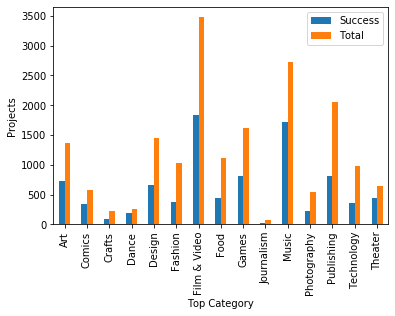

In [ ]:
success_df = kickstarter_df.groupby(['Top Category']).sum()[['Success']]
success_df['Total'] = kickstarter_df.groupby(['Top Category']).count()[['Success']]
success_plot = success_df.plot(kind='bar')
success_plot.set_ylabel('Projects')

We may also want to know the total successes and total number of projects.

Text(0, 0.5, 'Projects')

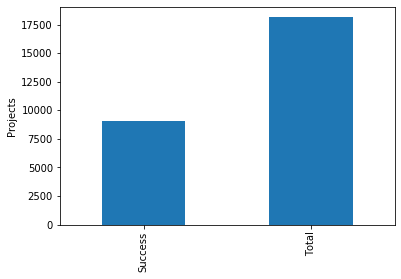

In [ ]:
total_success_df = kickstarter_df[['Success']].sum()
total_success_df['Total'] = kickstarter_df.shape[0]
total_success_plot = total_success_df.plot(kind='bar')
total_success_plot.set_ylabel('Projects')

We may be interested in the success rate for each genre from most to least successful. We also include one bar for any category.

Text(0, 0.5, 'Success Rate')

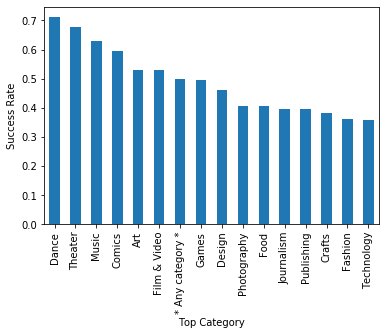

In [ ]:
success_rate_df = success_df['Success'] / success_df['Total']
success_rate_df.loc['* Any category *'] = kickstarter_df['Success'].sum() / kickstarter_df.shape[0]
plot = success_rate_df.sort_values(ascending=False).plot(kind='bar')
plot.set_ylabel('Success Rate')